# Diabetes Prediction CSC 2621 Final Project


### Group Members:
###### Oliver Grudzinski
###### Pranaav Paladugu
###### Alec Weinbender

## Research Question

With this project, we are attempting to see whether there any variables that we can use to diagnostically predict whether or not a patient has diabetes, based on the data in the dataset.

## Hypotheses

#### Hypotheses Statements:

Null Hypothesis Example - A given variable does not influence whether a patient may have diabetes.

Alternative Hypothesis Example - A given variable does influence whether a patient may have diabetes.

Examples:

H0 (Glucose) – Glucose levels do not influence whether a patient may have diabetes.

HA (Glucose) – Glucose levels do have an influence on whether a patient may have diabetes.

H0 (BMI) – The patient’s BMI does not influence whether a patient may have diabetes.

HA (BMI) – The patient’s BMI does influence on whether a patient may have diabetes.

H0 (Age) – The patient’s age does not influence whether a patient may have diabetes.

HA (Age) – The patient’s age does influence on whether a patient may have diabetes.

H0 (Diabetes Pedigree Function) – The patient’s DPF levels do not influence whether a patient may have diabetes.

HA (Diabetes Pedigree Function) – The patient’s DPF levels do have an influence on whether a patient may have diabetes.

## Dataset

#### Explanation of the Dataset:

This dataset was created to do what we are doing, which is to diagnostically predict whether or not a patient has diabetes. All of the data in this dataset is taken from female patients that are at least 21 years old and of Pima Indian heritage.

#### Description of Features:
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: patient's (years)

#### Target Variable:
The target variable is Outcomes:

0 = Negative for Diabetes (500)

1 = Positive for Diabetes (268)

In [1]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
features = df.columns.drop('Outcome').tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## Data Preprocessing

Checking for null values and values set to 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# import pandas as pd
#
# has_zero = df.applymap(lambda x: x == 0).any().any()
#
# print("DataFrame has zero values:", has_zero)

In [6]:
# Replace 0 values in the specified columns with the mean of the column
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0s in '{column}': {num_zeros}")
    df[column] = df[column].replace(0, df[column].mean())

for column in columns_to_check:
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0s in '{column}': {num_zeros}")

Number of 0s in 'Glucose': 5
Number of 0s in 'BloodPressure': 35
Number of 0s in 'SkinThickness': 227
Number of 0s in 'Insulin': 374
Number of 0s in 'BMI': 11
Number of 0s in 'Glucose': 0
Number of 0s in 'BloodPressure': 0
Number of 0s in 'SkinThickness': 0
Number of 0s in 'Insulin': 0
Number of 0s in 'BMI': 0


## Data Analysis and Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Viewing the Data after Preprocessing

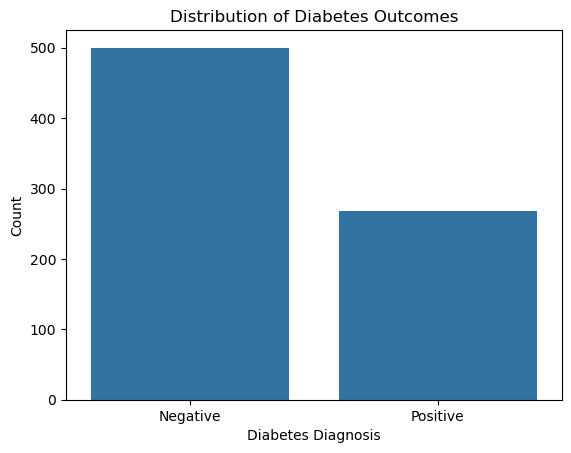

In [10]:
outcomes = df['Outcome']
sns.countplot(x=outcomes)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcomes")
plt.show()

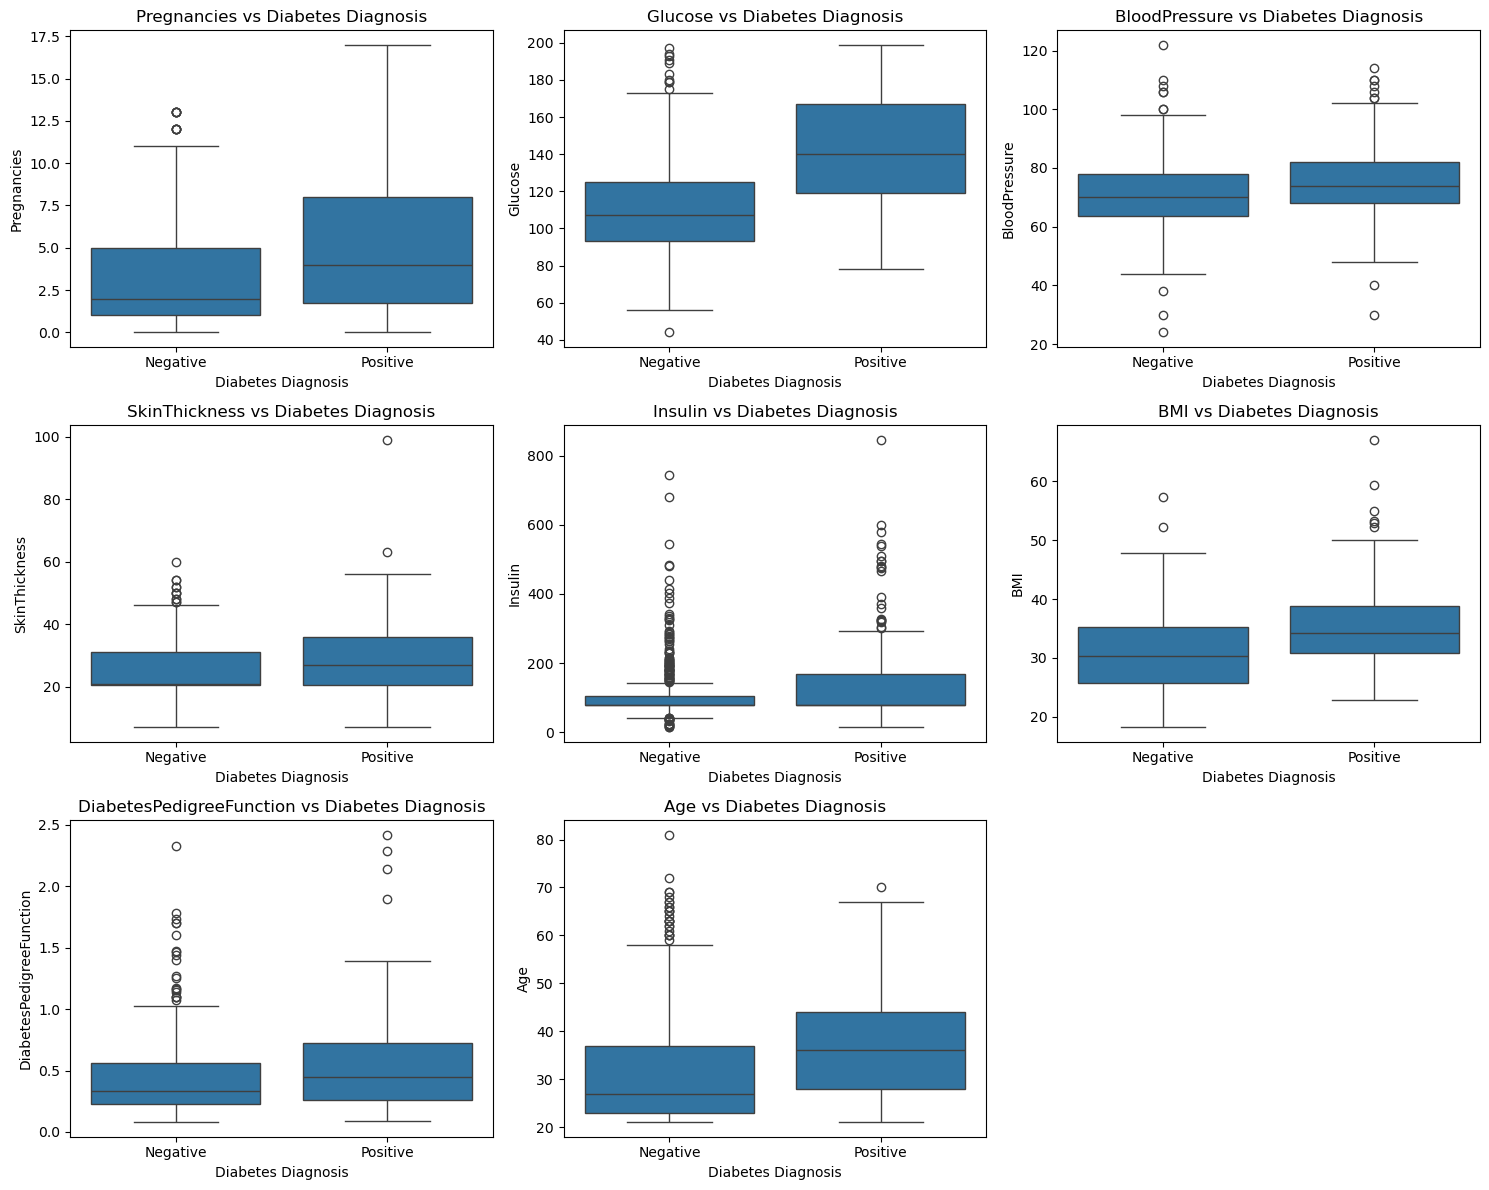

In [11]:
features = df.columns.drop('Outcome')
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=outcomes, y=df[feature])
    plt.xlabel("Diabetes Diagnosis")
    plt.ylabel(feature)
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.title(f"{feature} vs Diabetes Diagnosis")

plt.tight_layout()
plt.show()

#### Hypothesis Testing

In [12]:
from scipy import stats
import numpy as np
import pandas as pd

df = pd.read_csv("data/diabetes.csv")

Outcome = df["Outcome"]

columns_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
Correction = True
length3 = len(df)
count = 0
threshold = (0.05)/8
ColumnsLength = len(df.columns)
Dict = {}
var = []
pval = []
Dict = {"Variable":[], "T-stat": [], "P-value": [], "Correction":[]}
for variable in columns_list:
        samples_by_group = []
        for value in set(df[variable]):
            mask = df[variable] == value
            samples_by_group.append(df['Outcome'][mask])
        kstat, Kp = stats.kruskal(*samples_by_group)
        if(Kp < ((threshold)/length3)):
            Correction = True
        elif(Kp > ((threshold)/length3)):
            Correction = False
        Dict["T-stat"].append(kstat)
        Dict["P-value"].append(Kp)
        pval.append(Kp)
        var.append(variable)
        Dict["Correction"].append(Correction)
        Dict["Variable"].append(variable)

table = pd.DataFrame(Dict)

sorted_df = table.sort_values(by=['P-value'], ascending=True)

sorted_df.head(10)

,Variable,T-stat,P-value,Correction
1,Glucose,269.382027,5.586210e-11,True
7,Age,140.754007,2.450833e-10,True
0,Pregnancies,64.510701,8.940856e-08,True
3,SkinThickness,73.467109,1.699207e-02,False
4,Insulin,227.473254,1.818808e-02,False
5,BMI,286.097245,4.422738e-02,False
2,BloodPressure,54.862435,1.738525e-01,False
6,DiabetesPedigreeFunction,532.330054,3.002203e-01,False


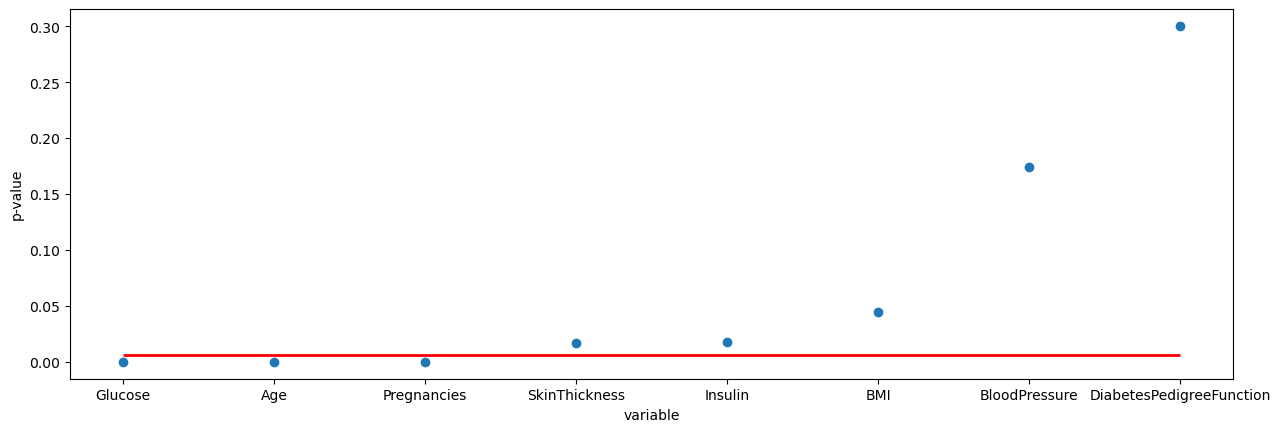

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(sorted_df['Variable'])
y = np.array(sorted_df['P-value'])

f = plt.figure()
f.set_figwidth(15)

plt.xlabel('variable')
plt.ylabel('p-value')

plt.scatter(x, y)
plt.hlines(y=threshold, xmin=0, xmax=7, linewidth=2, color='r')
plt.show()

## Data Modeling and Prediction

## Results Analysis